<img src="https://global-uploads.webflow.com/5f0d53c042a9ed6288de7f8d/5f6337ae2cfaa10946ceeb06_Hacktiv8%20logo%20horizontal%2001%20black-p-500.png" width="500">
<h1 align="center"><font size="7"><strong>Final Project 4</strong></font></h1>
<h2 align="center"><font size="6"><strong>(CLUSTERING)</strong></font></21>


------------------------------------------------
### __Kelompok 2 - PYTN KS 019 - Dyah Ayu Kusuma Wardhani__

# **A. INTRODUCTION**
----
## 1. Latar Belakang
Marketing memiliki peran sentral dalam pertumbuhan dan keberlanjutan bisnis, terutama di sektor perbankan. Segmentasi pelanggan menjadi kunci dalam merancang strategi pemasaran yang efektif. Khususnya, pada industri kartu kredit, pemahaman mendalam tentang kebiasaan pembelian dan perilaku pelanggan menjadi esensial.

Metode statistik dan pembelajaran machine learning menggunakan konsep clustering akan digunakan untuk mengelompokkan pelanggan berdasarkan preferensi pembelian, kecenderungan pembayaran, dan kebiasaan penarikan tunai. Dengan menggabungkan pendekatan statistik dan machine learning, tujuan utama proyek ini adalah menciptakan strategi pemasaran yang efektif untuk produk-produk bank. 

Melalui segmentasi pelanggan, diharapkan dapat ditemukan pola perilaku yang dapat membimbing bank dalam menyesuaikan penawaran produk dan meningkatkan kepercayaan pelanggan. Dataset yang terdiri dari informasi transaksi 8950 pemegang kartu kredit selama 6 bulan dengan 18 variabel. 

## 2. Dataset
Analisis ini menggunakan dataset yang bersumber dari Kaggle yaitu [Credit Card Dataset for Clustering](https://www.kaggle.com/datasets/arjunbhasin2013/ccdata)

## 3. Objektif
Objektif yang ingin dicapai antara lain:
- Untuk mengetahui faktor-faktor yang berpengaruh dalam pengelompokan pelanggan kartu kredit
- Untuk membuat beberapa model yang dianggap paling sesuai dengan konsep clustering sehingga diperoleh pengelompokan yang tepat
- Untuk mengelompokkan pelanggan kartu kredit berdasarkan faktor-faktor yang mempengaruhinya menggunakan konsep clustering

# **B. IMPORT LIBRARY**
----

In [1]:
# Import library dataframe
import numpy as np
from numpy import mean
import pandas as pd

# Import library untuk visualisasi
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
import seaborn as sns

# Import library untuk preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# Import library untuk modelling/analysis
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score, davies_bouldin_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA, KernelPCA
from sklearn_extra.cluster import KMedoids
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import make_classification

# Import library untuk mengabaikan peringatan
import warnings
warnings.filterwarnings("ignore")

# **C. DATA LOADING**
----

## 1. Memanggil Dataset

In [2]:
df = pd.read_csv("CC GENERAL.csv")

df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


**Dataset info:**

Dataset ini berisi 18 kolom yang bertipe data integer, float, dan object. Masing-masing kolom memiliki arti tersendiri dan dapat dikelompokkan sebagai berikut:

1. Balance
    - `BALANCE` = Saldo jumlah yang tersisa di akun mereka untuk melakukan pembelian
    - `BALANCE_FREQUENCY` = Seberapa sering Saldo diperbarui, skor antara 0 dan 1 (1 : sering diperbarui, 0 : tidak sering diperbarui)

2. Purchases
    - `PURCHASES` = Jumlah pembelian yang dilakukan dari akun
    - `ONEOFF_PURCHASES` = Jumlah pembelian maksimum dilakukan dalam sekali jalan
    - `INSTALLMENTS_PURCHASES` = Jumlah pembelian yang dilakukan secara mencicil

3. Purchases Frequency
    - `PURCHASES_FREQUENCY` Seberapa sering Pembelian dilakukan, skor antara 0 dan 1 (1 : sering dibeli, 0 : tidak sering dibeli)
    - `ONEOFF_PURCHASES_FREQUENCY` = Seberapa sering Pembelian terjadi dalam sekali jalan (1 : sering dibeli, 0 : tidak sering dibeli)
    - `PURCHASES_INSTALLMENTS_FREQUENCY` = Seberapa sering pembelian dengan mencicil dilakukan (1 : sering dilakukan, 0 : tidak sering dilakukan)
    - `PURCHASESTRX` = Jumlah transaksi pembelian yang dilakukan

4. Cash Advance
    - `CASHADVANCE` = Uang muka yang diberikan oleh pengguna
    - `CASHADVANCE_FREQUENCY` Seberapa sering uang muka dibayarkan
    - `CASH_ADVANCE_TRX` = Jumlah Transaksi yang dilakukan dengan "Cash in Advanced"

5. Payments
    - `PAYMENTS` = Jumlah Pembayaran yang dilakukan oleh pengguna
    - `MINIMUM_PAYMENTS` = Jumlah minimum pembayaran yang dilakukan oleh pengguna
    - `PRC_FULL_PAYMENT` = Persentase pembayaran penuh yang dibayarkan oleh pengguna

6. Lainnya
    - `CUST_ID` = Identifikasi pemegang Kartu Kredit (Categorical)
    - `CREDIT_LIMIT` = Batas Kartu Kredit untuk pengguna
    - `TENURE` = Masa berlaku layanan kartu kredit untuk pengguna

## 2. Melihat Ukuran Data

In [3]:
df.shape

(8950, 18)

## 3. Melihat Data Colums

In [4]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

## 4. Melihat Info Data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

## 5. Deskriptif Statistik Data

In [6]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


## 6. Melihat Unique Value Setiap Atribut

In [7]:
df.nunique()

CUST_ID                             8950
BALANCE                             8871
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8636
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

# **D. DATA CLEANING**
---

## 1. Menghapus Kolom yang Tidak Diperlukan

In [8]:
# menghapus kolom cust_id
df.drop('CUST_ID', axis = 1,inplace= True)

## 2. Mengatasi Missing Value

In [9]:
# mengecek nilai Nan
df.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Terdapat missing value pada kolom `CREDIT_LIMIT` dan `MINIMUM_PAYMENT`

In [10]:
# Melihat presentase missing value pada setiap kolom
missing_value = df.apply(lambda x: f'{((x.isnull().sum()/df.shape[0])*100).round(2)} %').sort_values(ascending=True)
missing_value

BALANCE                              0.0 %
PAYMENTS                             0.0 %
PURCHASES_TRX                        0.0 %
CASH_ADVANCE_TRX                     0.0 %
CASH_ADVANCE_FREQUENCY               0.0 %
PRC_FULL_PAYMENT                     0.0 %
ONEOFF_PURCHASES_FREQUENCY           0.0 %
PURCHASES_INSTALLMENTS_FREQUENCY     0.0 %
CASH_ADVANCE                         0.0 %
INSTALLMENTS_PURCHASES               0.0 %
ONEOFF_PURCHASES                     0.0 %
PURCHASES                            0.0 %
BALANCE_FREQUENCY                    0.0 %
PURCHASES_FREQUENCY                  0.0 %
TENURE                               0.0 %
CREDIT_LIMIT                        0.01 %
MINIMUM_PAYMENTS                     3.5 %
dtype: object

Pada atribu `CREADIT_LIMIT` hanya terdapat 0,01% atau 1 missing value, jadi missing value dapat dihapus karena tidak akan terlalu berpengaruh yang signifikan pada analisis nanti.

In [11]:
# Menghapus missing value pada kolom 'CREDIT_LIMIT'
df.dropna(subset=['CREDIT_LIMIT'], inplace=True)

Missing value pada atribut `MINIMUM_PAYMENTS` dilakukan diatasi menggunakan imputasi median. Hal tersebut karena median memberikan estimasi yang lebih baik dari central tendency dari fitur ini.

In [12]:
# Mengatasi miising value pada atribut 'MINIMUM_PAYMENTS'
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

X = df['MINIMUM_PAYMENTS'].values.reshape(-1,1)
X = imputer.fit_transform(X)

df['MINIMUM_PAYMENTS'] = X

In [13]:
# Mengecek kembali missing value
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Setelah dilakukan dropna dan imputasi median, dapat dilihat bahwa pada Dataset sudah tidak terdapat missing value.

## 3. Mengecek Duplicate Data

In [14]:
df.duplicated().value_counts()

False    8949
Name: count, dtype: int64

Setelah dilakukan analisi, tidak terdapat duplicat pada keseluruhan data

# **E. EXPLORATORY DATA ANALISIS (EDA)**
----

## 1. Deskriptif Statistik

In [15]:
data = df.copy()

coll= ["BALANCE_FREQUENCY",'PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY']
data[coll] = df[coll].round().astype(int)

In [16]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000
mean,1564.647593,0.893508,1003.316936,592.503572,411.113579,978.959616,0.463404,0.150073,0.345290,0.135141,3.249078,14.711476,4494.449450,1733.336511,845.003358,0.153732,11.517935
std,2081.584016,0.308484,2136.727848,1659.968851,904.378205,2097.264344,0.498687,0.357163,0.475489,0.200132,6.824987,24.858552,3638.815725,2895.168146,2332.905284,0.292511,1.337134
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.365782,1.000000,39.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.282850,170.875613,0.000000,12.000000
50%,873.680279,1.000000,361.490000,38.000000,89.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,3000.000000,857.062706,312.452292,0.000000,12.000000
75%,2054.372848,1.000000,1110.170000,577.830000,468.650000,1113.868654,1.000000,0.000000,1.000000,0.222222,4.000000,17.000000,6500.000000,1901.279320,788.721609,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


**Diperoleh informasi :**
1. Rata-rata saldo nasabah bank adalah 1564.64  dollar
2. Rata-rata saldo update dari nasabah yakni 0,893 yang artinya mayoritas nasabah aktif mengupdate saldonya.
3. Purchases paling banyak yakni 49039.57 purchases
4. Credit limit nasabah nbank minimal yaitu 50 dollar dan maksimal yaitu 30000 dollar.

## 2. Masa Berlaku Kartu Kredit Nasabah

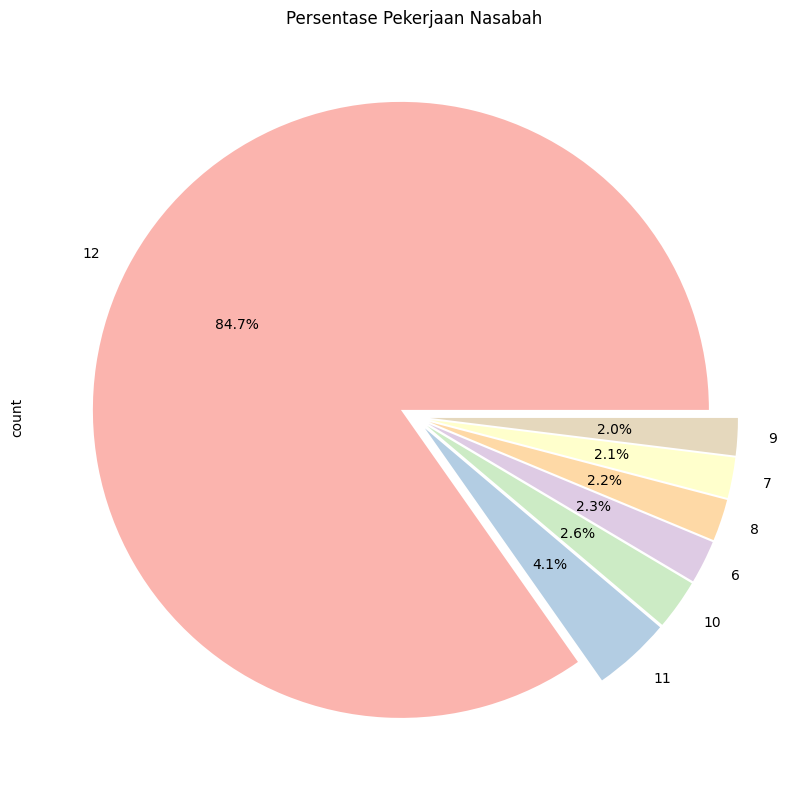

In [17]:
plt.figure(figsize=(10, 10))
ax = plt.axes()

plt.title('Persentase Pekerjaan Nasabah')
data['TENURE'].value_counts().plot.pie(autopct='%1.1f%%', 
                                      explode=[0.05] * len(data['TENURE'].unique()), 
                                      colors=sns.color_palette('Pastel1')[:len(data['TENURE'].unique())])

plt.show()

In [18]:
#Mengetahui masa berlaku layanan kartu kredit pengguna
data.groupby("TENURE").size().sort_values(ascending = False)

TENURE
12    7584
11     365
10     236
6      203
8      196
7      190
9      175
dtype: int64

**Kesimpulan :**
- Masa berlaku layanan kartu kredit nasabah paling banyak berlaku selama 12 bulan yaitu terdapat 7584 nasabah atau 84.7%, lalu 11 bulan terdapat 365 nasabah atau 4.1% dan 10 bulan terdapat 236 nasabah atau 2.6%, 
- Masa berlaku kartu kredit 9 bulan merupakan masa kartu kredit yang memiliki jumlah nasabah paling sedikit diantara yang lainnya, yaitu 175 nasabah atau 2.0%


## 3. Pembelian dan Pembayaran berdasarkan Jangka Waktu Kartu Kredit

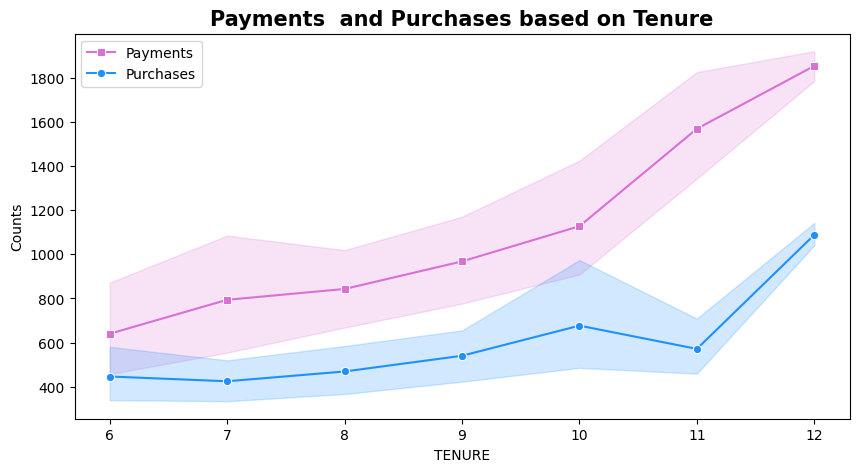

In [19]:
plt.figure(figsize=(10, 5))
plt.title('Payments  and Purchases based on Tenure', fontweight='bold', fontsize=15)

sns.lineplot(x="TENURE", y='PAYMENTS', data=data, color='orchid', marker="s", label='Payments')

# Line plot for PURCHASES
sns.lineplot(x="TENURE", y='PURCHASES', data=data, color='dodgerblue', marker="o", label='Purchases')


plt.legend()
plt.ylabel('Counts')
plt.show()

**Kesimpulan:**
- Jumlah nasabah melakukan pembelian meningkat berdasarkan masa berlaku penggunaan kartu kredit yang dimiliki, tetapi sempat menurun pada masa berlaku 11 bulan. Jumlah pembelian tertinggi terdapat pada masa berlaku penggunaan layanan kartu kredit selama 12 bulan
- Begitu juga dengan pembayaran, semakin lama masa berlaku kartu kredit maka semakin banyak jumlah nasabahnya.


## 4. Frekuensi Pembelian yang Dilakukan Secara Menyicil

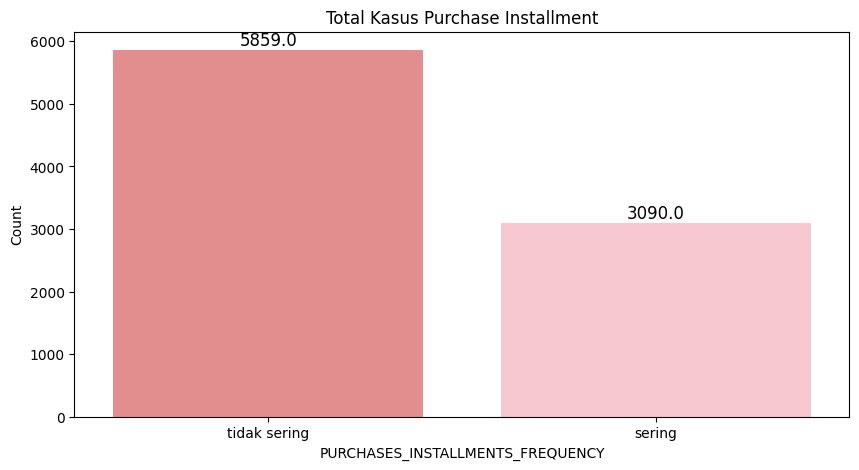

In [20]:
values = data['PURCHASES_INSTALLMENTS_FREQUENCY'].value_counts()

plt.figure(figsize=(10, 5))
ax = sns.countplot(x='PURCHASES_INSTALLMENTS_FREQUENCY', data=data, palette=['lightcoral', 'pink'])
ax.set(title='Total Kasus Purchase Installment', ylabel='Count')

# Tampilkan nilai absolut pada bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 7), textcoords='offset points', fontsize=12)
ax.set_xticklabels(['tidak sering','sering'])
plt.show()


**Kesimpulan**
- Nasabah kartu kredit tidak sering mencicil saat melakukaan pembelian
- Banyak yang dilakukan secara mencicil yaitu 5859 kasus dan 3090 sering mencicil saat melakukan pembelian. 


## 5. Korelasi Credit Limit dan Payments Berdasarkan Frekuensi Pembelian

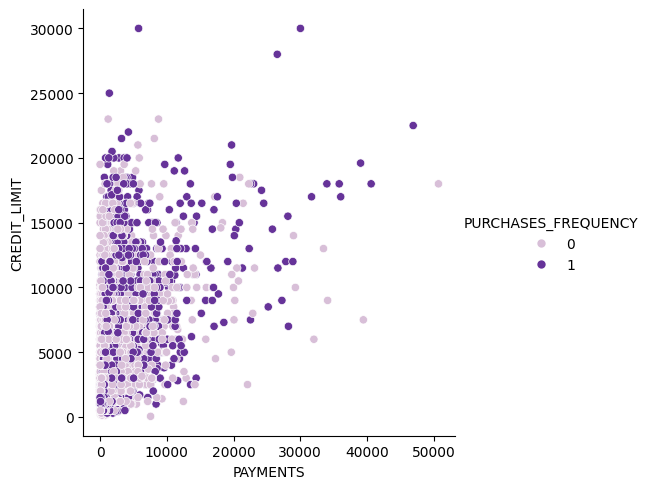

In [21]:
vs = data[['PAYMENTS', 'CREDIT_LIMIT', 'PURCHASES_FREQUENCY']]

# Plot relatif dengan palet warna kustom
sns.relplot(data=vs, x='PAYMENTS', y='CREDIT_LIMIT', hue='PURCHASES_FREQUENCY', palette=('thistle','rebeccapurple'))
plt.show()


Ket :
<br> 0 : tidak sering
<br>1 : sering

**Kesimpulan :**
- Semakin besar credit limit, maka semakin besar pula jumlah pembayaran untuk pembelian yang dilakukan. Artinya, ada korelasi antara credit limit dengan pembayaran.
- Pembayaran tertinggi yang sering dilakukan untuk pembelian terdapat pada rentang credit limit antara 20.000-25.000.


## 6. Distribusi Pada Semua Atribut

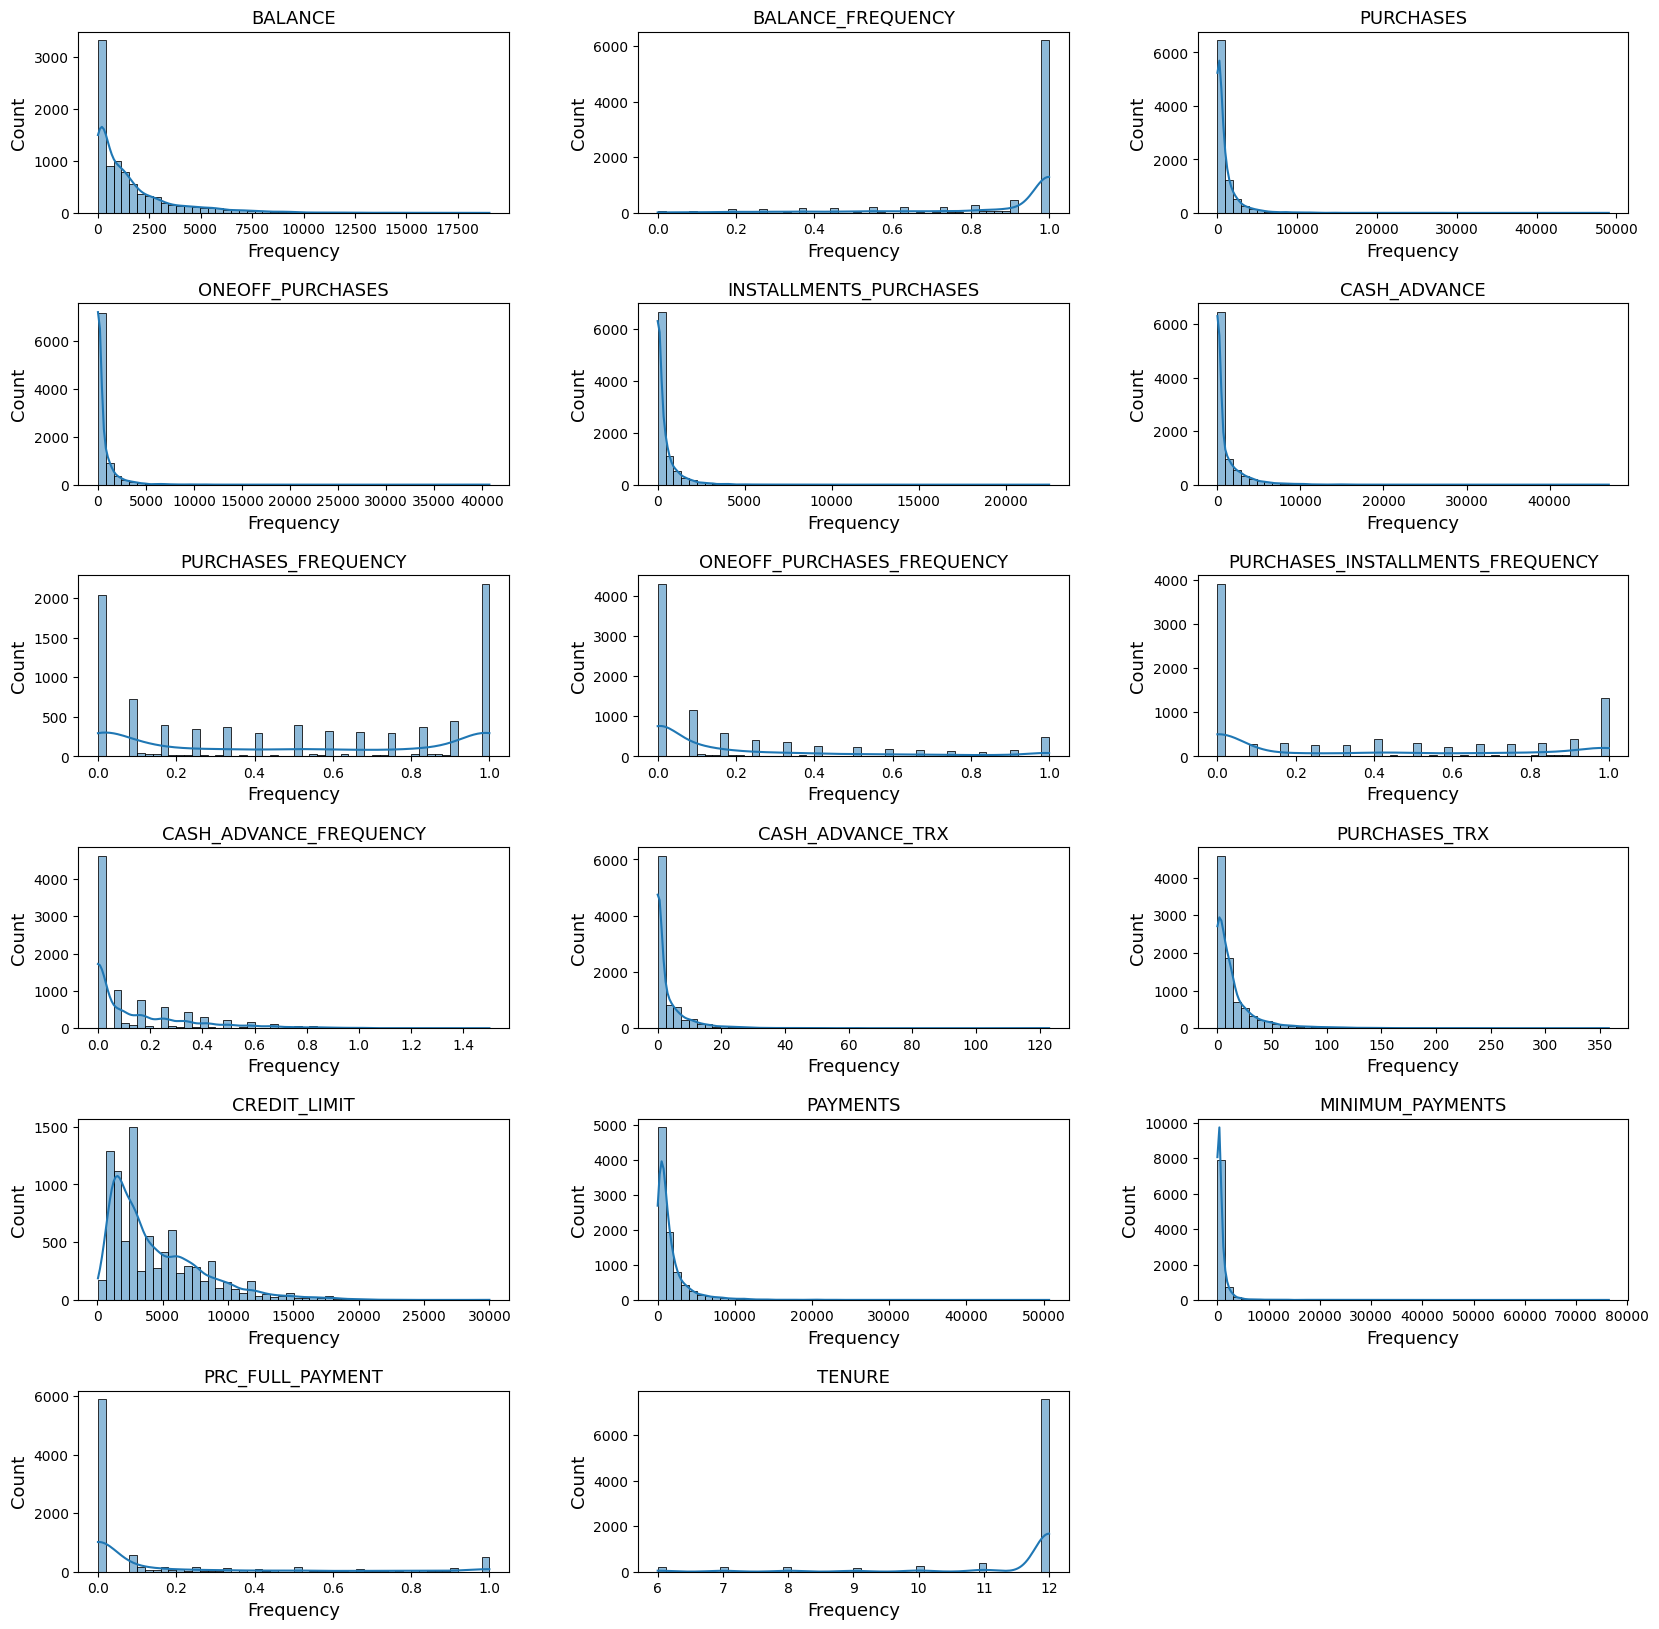

In [22]:
plt.figure(figsize=(20,20))
for i, col in enumerate(df.columns):
    plt.subplot(6,3,i+1)
    plt.title(col, fontsize=13)
    plt.xlabel('Frequency', fontsize=13)
    plt.ylabel("Count", fontsize=13)
    plt.subplots_adjust(hspace=0.5, wspace=0.3)
    sns.histplot(data=df, x=col, bins=50,kde=True)

plt.show()

**Kesimpulan:**
<br>Berdasarkan histogram terlihat bahwa semua terdapat banyak skewness dan sangat bervariasi. Skewness bervariasi dikarenakan ada beberapa pelanggan yang melakukan transaksi dalam jumlah yang sangat tinggi.

## 7. Melihat Outlier pada Data

In [23]:
from scipy.stats import skew

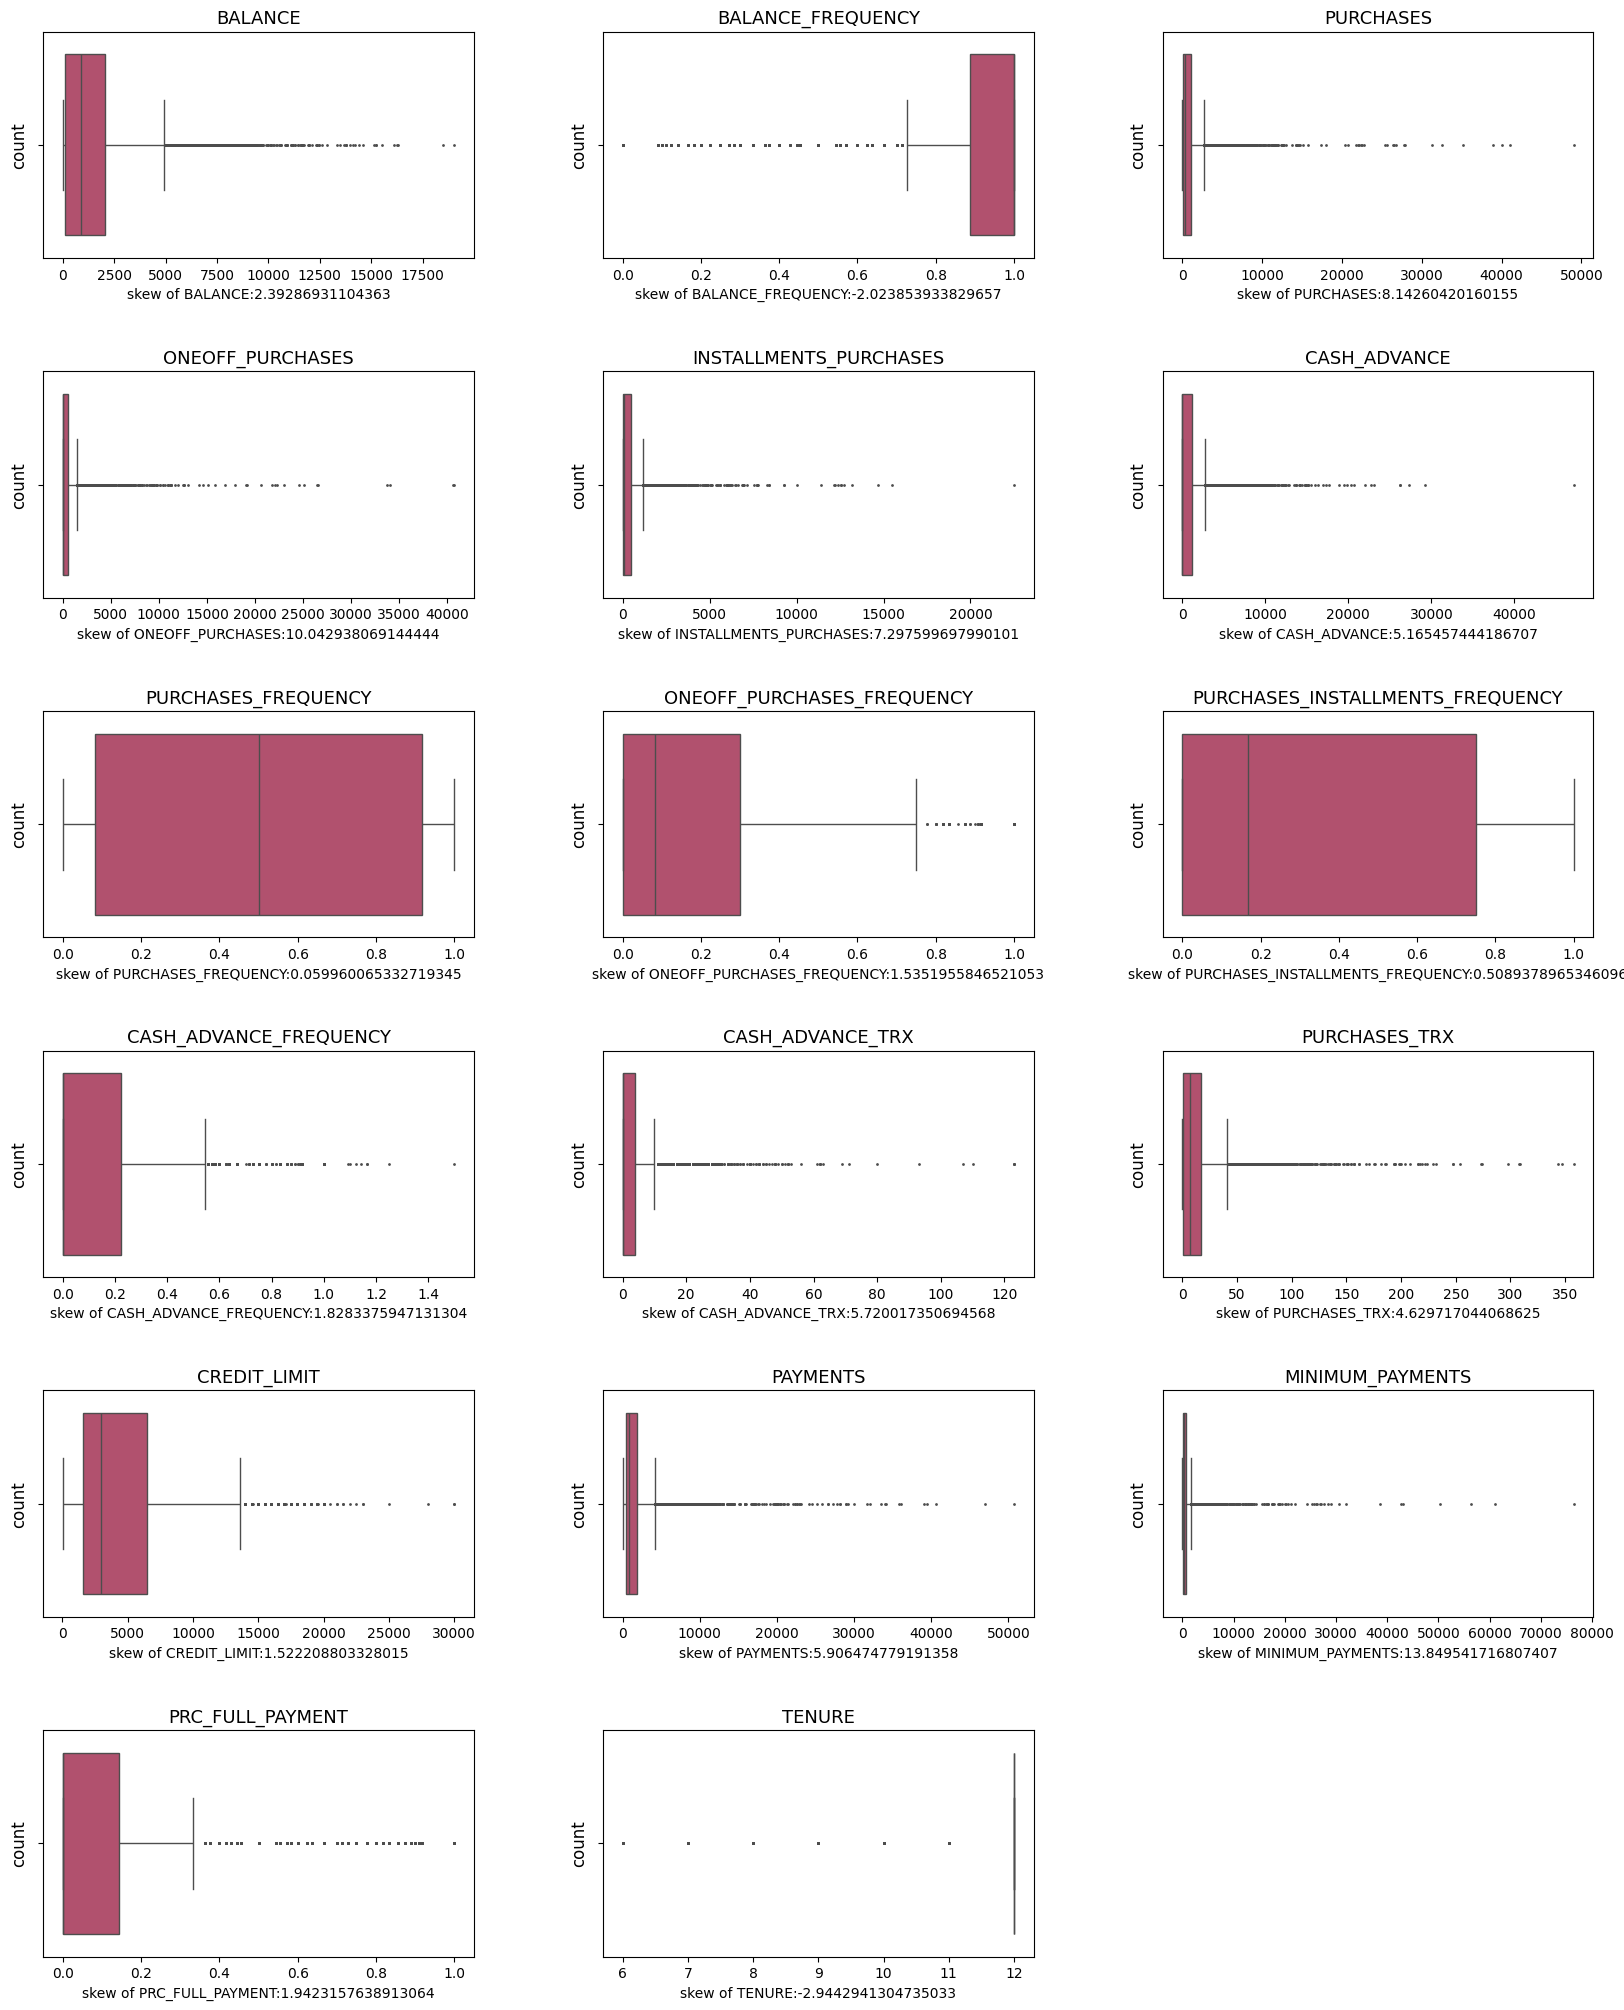

In [24]:
cols = df.columns.to_list()
plt.figure(figsize =(20,25))
for i, col in enumerate(cols):
    plt.subplot(6,3,i+1)
    plt.title(col, fontsize=13)
    plt.xlabel(f"skew of {col}:{skew(df[col])}")
    plt.ylabel("count",fontsize=12)
    plt.subplots_adjust(hspace=0.5, wspace=0.3)
    sns.boxplot(data=df, x=col, palette='flare', fliersize=1)

**Insight :**
<br>Dari analisisi diatas dapat bahwa terdapat outlier, namun outlier tersebut terlihat seperti outlier normal, bukan dari kesalahan input. Hal ini terjadi kemungkin dikarenakan ada nasabah yang bertransaksi dalam jumlah sangat besar dan juga melakaukan transaksi yang sangat jarang.

# **Analisis Corellation**

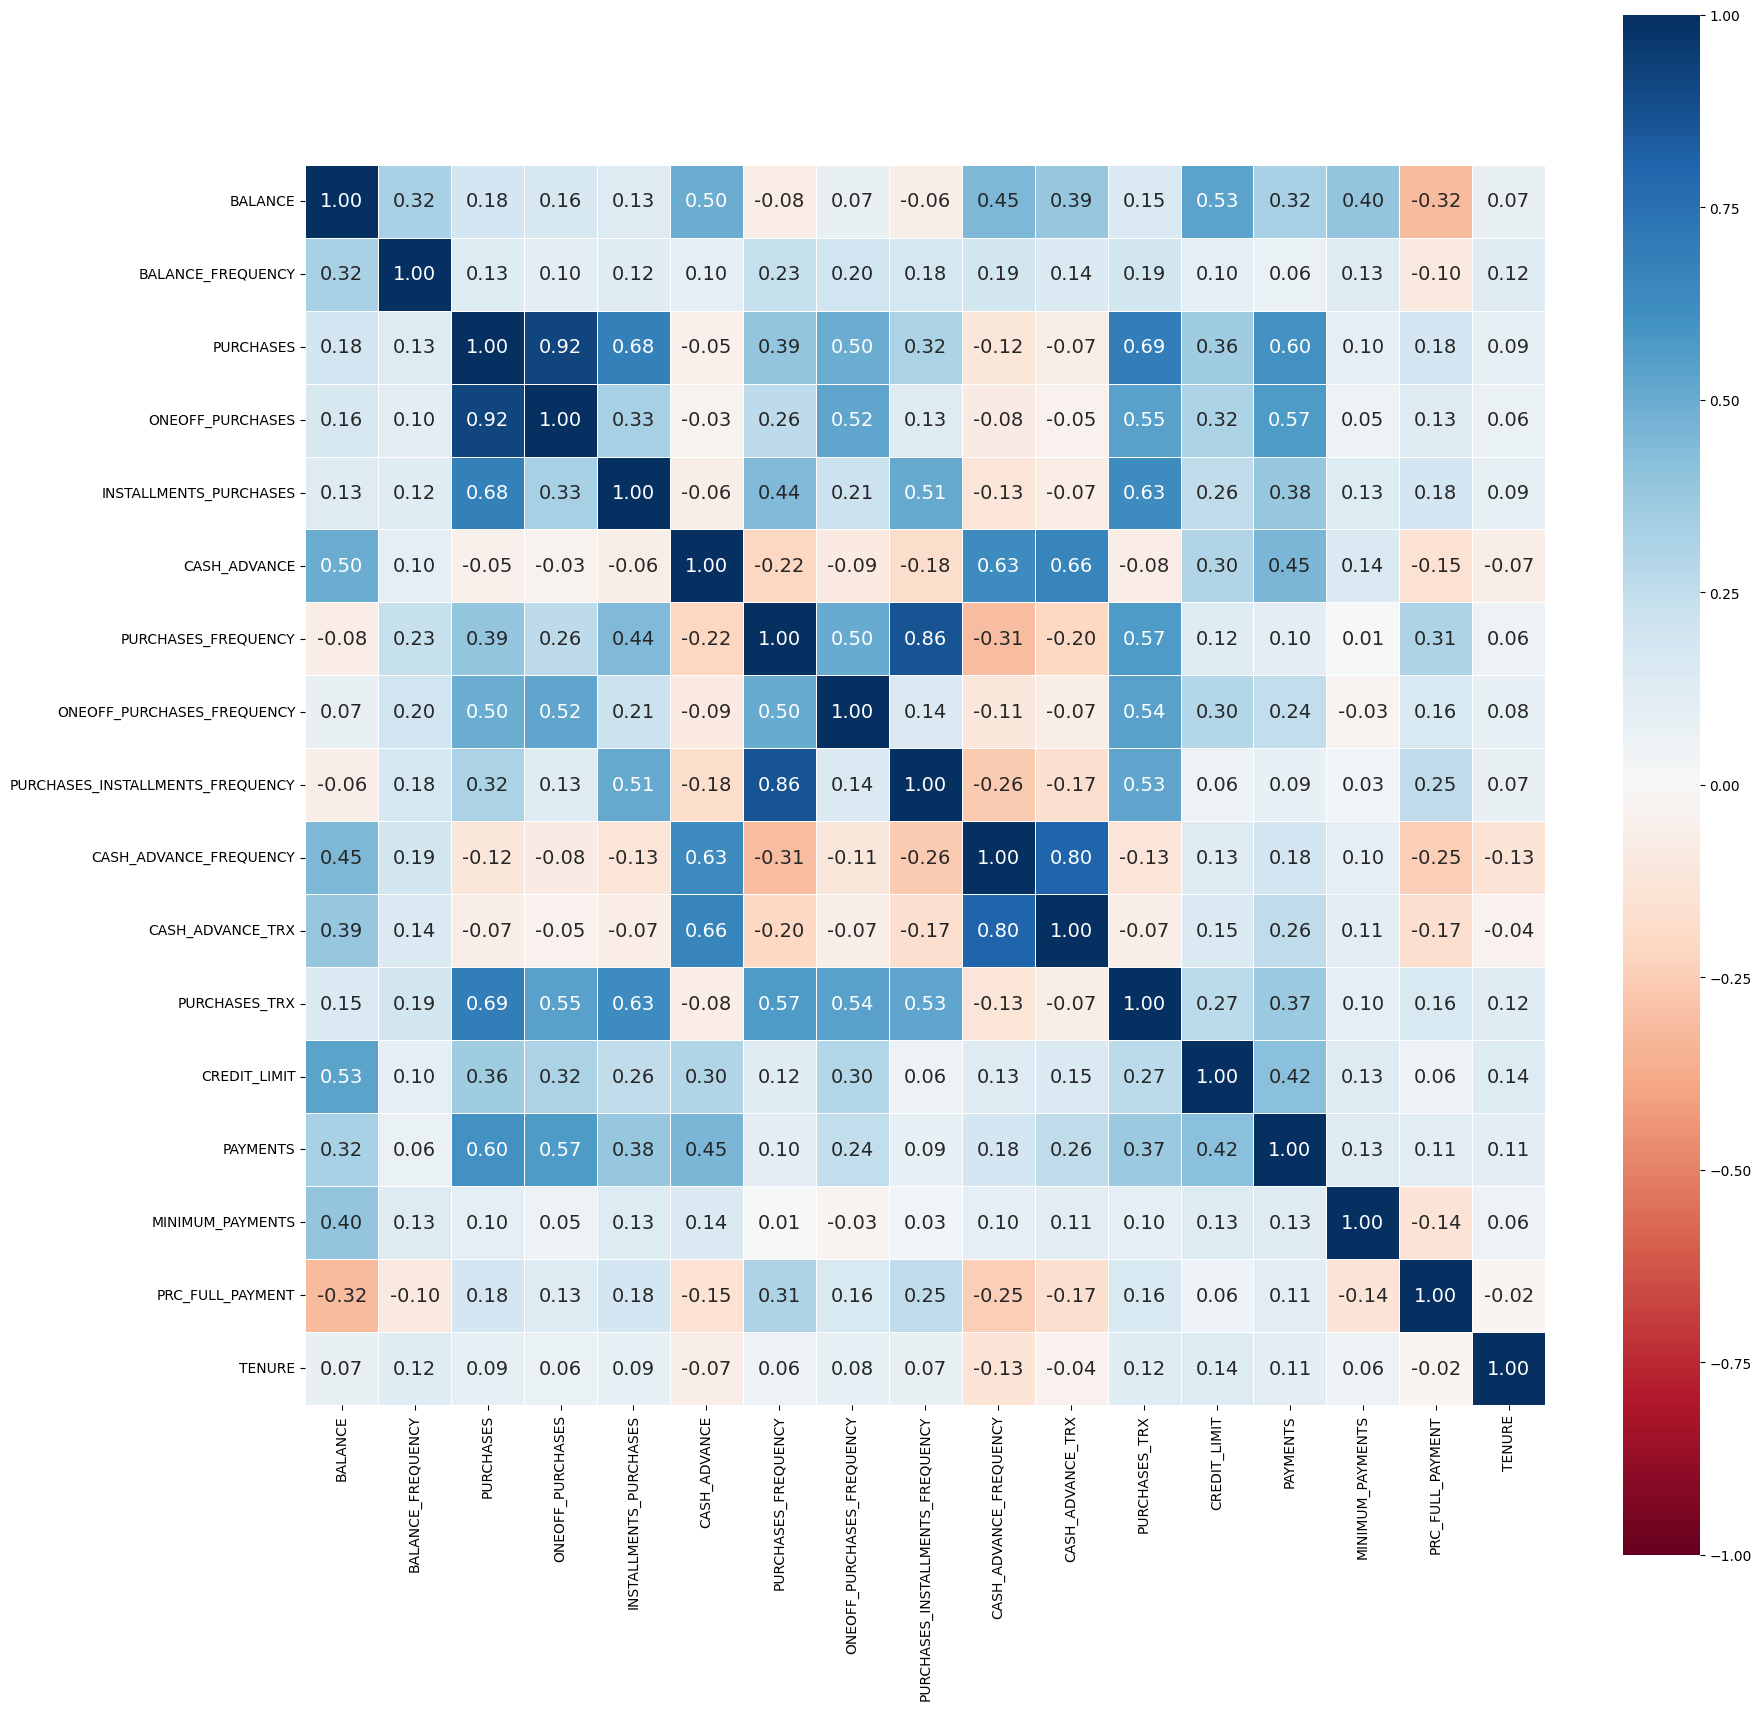

In [25]:
fig, ax = plt.subplots(figsize=(20,20))
cm = sns.heatmap(df.corr(), linewidths = .5, annot=True, fmt='.2f', cmap='RdBu', annot_kws={'size':14},square=True, vmax=1, vmin=-1,)

Terlihat bahwa terdapat korelasi yang kuat (> 0,8), maka dapat diketahui bahwa terdapat korelasi antar fitur yaitu sebagai berikut:
**Korelasi yang sangat kuat:**<br>
- `purchases_installments_frequency` dan `purchases_frequency` dengan nilai korelasi 0.86. Hal tersebut dapat diartikan bahwa pembayaran dengan metode cicilan sering terjadi.
- `cash_advance_trx` dan `cash_advance_frequency` dengan nilai korelasi 0,8. Hal tersebut menunjukkan bahwa pembayaran di muka sering terjadi.
- `oneoff_purchases` dan `purchases` dengan nilai korelasi 0.92. Hal tersebut karena pembelian satu kali merupakan bagian dari pembelian.



# __E. PREPROCESSING DATA__

## 1. Feature Scaling
    Feature scaling adalah teknik untuk membuat skala data setiap fitur menjadi sama. Pada project ini, kami menggunakan MinMaxScaler dimana kami ingin ingin mempertahankan skala relatif data asli. Transform feature dilakukan dengan mengubah setiap data ke range tertentu antara 0-1

In [26]:
df_scaler = pd.DataFrame(MinMaxScaler().fit_transform(df), columns=df.columns)

In [27]:
df_scaler.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8949.0,0.082163,0.109309,0.0,0.006741,0.045879,0.107880,1.0
BALANCE_FREQUENCY,8949.0,0.877350,0.236798,0.0,0.888889,1.000000,1.000000,1.0
PURCHASES,8949.0,0.020459,0.043572,0.0,0.000812,0.007371,0.022638,1.0
ONEOFF_PURCHASES,8949.0,0.014536,0.040724,0.0,0.000000,0.000932,0.014176,1.0
INSTALLMENTS_PURCHASES,8949.0,0.018272,0.040195,0.0,0.000000,0.003956,0.020829,1.0
CASH_ADVANCE,8949.0,0.020768,0.044493,0.0,0.000000,0.000000,0.023630,1.0
PURCHASES_FREQUENCY,8949.0,0.490405,0.401360,0.0,0.083333,0.500000,0.916667,1.0
ONEOFF_PURCHASES_FREQUENCY,8949.0,0.202480,0.298345,0.0,0.000000,0.083333,0.300000,1.0
PURCHASES_INSTALLMENTS_FREQUENCY,8949.0,0.364478,0.397451,0.0,0.000000,0.166667,0.750000,1.0
CASH_ADVANCE_FREQUENCY,8949.0,0.090094,0.133422,0.0,0.000000,0.000000,0.148148,1.0


## 2. Hierarchical Clustering Dendrogram
    Visualisasi dendogram membantu untuk memahami struktur hierarki dan hubungan antara klaster atau kelompok data dalam analisis Hierarchical Clustering. Dalam dendrogram, sumbu x menunjukkan data poin, sedangkan sumbu y menunjukkan jarak antara klaster atau kelompok data. Tinggi setiap cabang pada dendrogram menunjukkan jarak atau kesamaan antara klaster atau kelompok data tersebut.

In [28]:
import scipy.cluster.hierarchy as sch

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [10.0, 10.0, 30.0, 30.0],
  [45.0, 45.0, 55.0, 55.0],
  [65.0, 65.0, 75.0, 75.0],
  [50.0, 50.0, 70.0, 70.0],
  [20.0, 20.0, 60.0, 60.0],
  [85.0, 85.0, 95.0, 95.0],
  [105.0, 105.0, 115.0, 115.0],
  [90.0, 90.0, 110.0, 110.0],
  [125.0, 125.0, 135.0, 135.0],
  [145.0, 145.0, 155.0, 155.0],
  [130.0, 130.0, 150.0, 150.0],
  [100.0, 100.0, 140.0, 140.0],
  [40.0, 40.0, 120.0, 120.0],
  [165.0, 165.0, 175.0, 175.0],
  [185.0, 185.0, 195.0, 195.0],
  [170.0, 170.0, 190.0, 190.0],
  [205.0, 205.0, 215.0, 215.0],
  [225.0, 225.0, 235.0, 235.0],
  [210.0, 210.0, 230.0, 230.0],
  [180.0, 180.0, 220.0, 220.0],
  [245.0, 245.0, 255.0, 255.0],
  [265.0, 265.0, 275.0, 275.0],
  [250.0, 250.0, 270.0, 270.0],
  [285.0, 285.0, 295.0, 295.0],
  [305.0, 305.0, 315.0, 315.0],
  [290.0, 290.0, 310.0, 310.0],
  [260.0, 260.0, 300.0, 300.0],
  [200.0, 200.0, 280.0, 280.0],
  [80.0, 80.0, 240.0, 240.0],
  [325.0, 325.0, 335.0, 335.0],
  [345

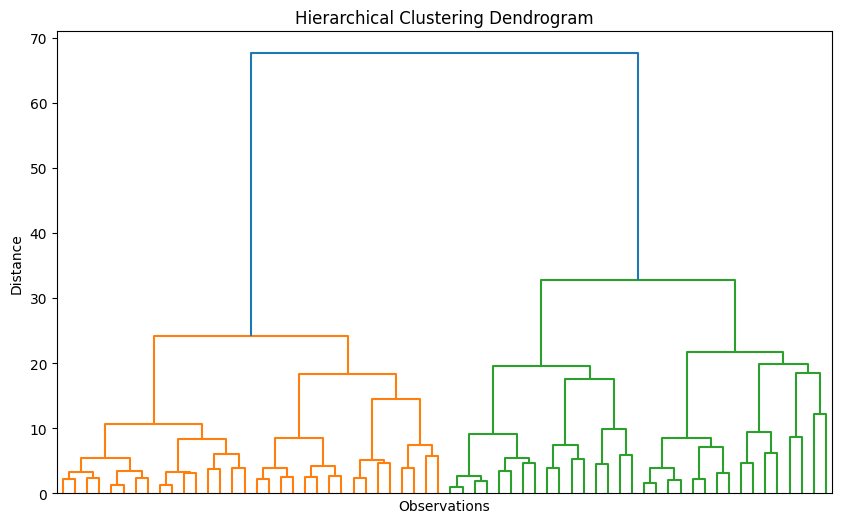

In [29]:
linkage_matrix = sch.linkage(df_scaler, method='ward')

plt.figure(figsize=(10,6))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
sch.dendrogram(linkage_matrix, truncate_mode='level', p=5, show_leaf_counts=False, no_labels=True)

Penentuan banyak cluster dari dendrogram dapat dilakukan dengan mencari garis vertikal terpanjang di mana dia tidak berpotongan dengan garis horizontal manapun. Dari gambar di atas diperoleh bahwa banyak kluster yang optimal yakni 4 kluster.

# __F. MODELLING__
-------

## 1. Model Defining
- K-Means 
  <br>K-means adalah salah satu algoritma clustering yang populer dalam machine learning. Tujuannya adalah untuk mengelompokkan data ke dalam beberapa kelompok berdasarkan kesamaan fitur. Model K-Means mencoba meminimalkan jumlah variansi dalam setiap kelompok dengan menempatkan pusat kelompok yang optimal. 

- K-Medoids
  <br> K-Medoids, juga dikenal sebagai Partitioning Around Medoids (PAM), adalah variasi dari algoritma K-Means yang menggunakan medoid sebagai pusat kelompok. Medoid adalah titik data dalam kelompok yang memiliki jarak total minimum ke semua titik data lainnya dalam kelompok.

In [30]:
model_df = df_scaler.copy()

In [31]:
# Model K-means
kmeans = KMeans(n_clusters=4)

In [32]:
# Model K-medoids
kmedoids = KMedoids(n_clusters=4)

## 2. Melatih Model

In [33]:
# melatih model K-means
kmeans.fit(model_df)

KMeans(n_clusters=4)

In [34]:
# melatih model Kmedoids
kmedoids.fit(model_df)

KMedoids(n_clusters=4)

## 3. Evaluasi Model
- Semakin kecil nilai DaviesBouldin Index (DBI) yang diperoleh (non-negatif >= 0), maka semakin baik cluster yang diperoleh dari pengelompokan menggunakan algoritma clustering (Bates & Kalita 2016)
- Silhouette Coefficient sebuah nilai antara -1 dan 1. Semakin tinggi scorenya, semakin baik. score 1 mengindikasikan cluster yang kuat dan 0 berarti overlapping cluster.



### - K-Means model

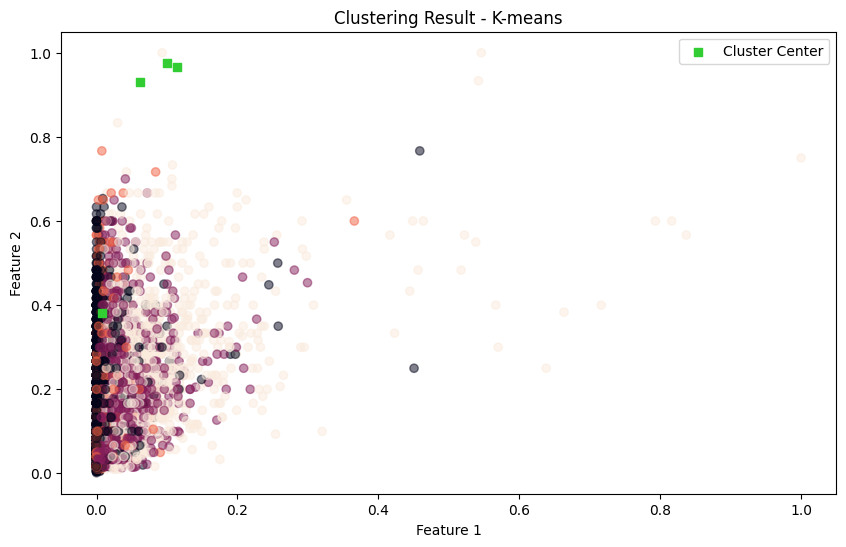

-------------------- Using K-Means Model -------------------------------
Davies-Bouldin index = 1.4233658194813423
Silhouette Score = 0.32150303017845605



In [35]:
centers1 = kmeans.cluster_centers_

# Visualize cluster centers
plt.figure(figsize=(10,6))
plt.scatter(model_df['PURCHASES'], model_df['CREDIT_LIMIT'], c=kmeans.labels_, cmap='rocket', alpha=0.5)
plt.scatter(centers1[:, 0], centers1[:, 1], c='limegreen', marker='s', label='Cluster Center')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Clustering Result - K-means')
plt.legend()
plt.show()

print("-------------------- Using K-Means Model -------------------------------")
print(f'Davies-Bouldin index = {davies_bouldin_score(model_df, kmeans.labels_)}')
print(f'Silhouette Score = {silhouette_score(model_df, kmeans.labels_)}\n')

### - K-Medoids model

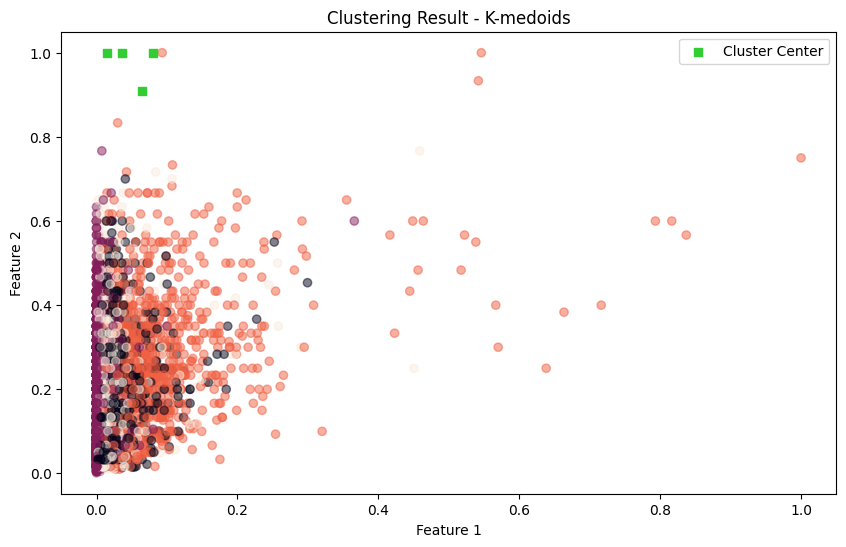

-------------------- Using K-Medoids -------------------------------
Davies-Bouldin index = 1.6202647553499647
Silhouette Score = 0.24415640694533997


In [36]:
centers2 = kmedoids.cluster_centers_

# Visualize cluster centers
plt.figure(figsize=(10,6))
plt.scatter(model_df['PURCHASES'], model_df['CREDIT_LIMIT'], c=kmedoids.labels_, cmap='rocket', alpha=0.5)
plt.scatter(centers2[:, 0], centers2[:, 1], c='limegreen', marker='s', label='Cluster Center')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Clustering Result - K-medoids')
plt.legend()
plt.show()

print("-------------------- Using K-Medoids -------------------------------")
print(f'Davies-Bouldin index = {davies_bouldin_score(model_df, kmedoids.labels_)}')
print(f'Silhouette Score = {silhouette_score(model_df, kmedoids.labels_)}')

### **Kesimpulan :**

Dapat dilihat bahwa dengan menggunakan **K-Means model** dapat **menghasilkan hasil cluster yang optimal** dapat dibuktikan dari score DBI paling mendekati 0 atau lebih kecil dibandingkan dengan metode K-Medoids dan score Silhouette yang mendekati 1 atau lebih besar dari K-Medoids.


# __G. K-Means Model__
------

## 1. Penentuan Jumlah Cluster Modeling
    Dalam metode ini, kita menjalankan algoritma K-Means dengan berbagai jumlah cluster dan menghitung Within-Cluster-Sum-of-Squares (WCSS) untuk setiap jumlah cluster. Titik 'elbow' atau 'siku' dalam plot WCSS adalah indikasi jumlah cluster yang optimal.

In [37]:
inertia = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_scaler)
    inertia.append(kmeans.inertia_)

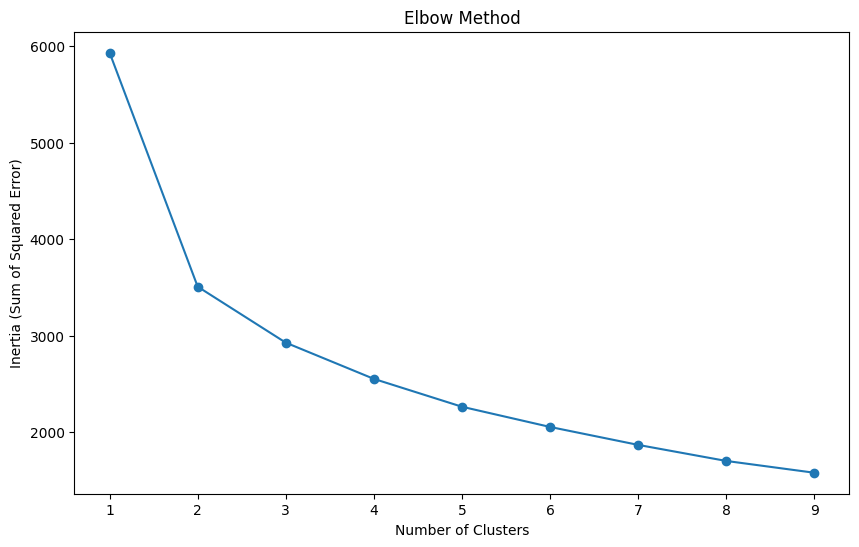

In [38]:
plt.figure(figsize=(10,6))
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Sum of Squared Error)')
plt.title('Elbow Method')
plt.show()

Dari hasil analisi menggunakan metode Elbow diketahui bahwa k kluster yang dapat dipilih yaitu 3-5 kluster. Dalam memilih banyaknya kluster harus mempertimbangkan computation cost, sehingga banyaknya k kluster yang dipilih yaitu 3 kluster.

## 2. Membentuk Model

In [39]:
df_kmeans = df_scaler.copy()

- Melatih model K-Means dengan 3 cluster

In [40]:
kmeans_model = KMeans(n_clusters=3, init='k-means++', random_state=42)

- Melakukan clustering menggunakan fungsi fit_predict dan mendapatkan label cluster untuk setiap pelanggan

In [41]:
kmeans_labels = kmeans_model.fit_predict(df_kmeans)
kmeans_model.fit(df_kmeans)

KMeans(n_clusters=3, random_state=42)

- Membuat Kolom baru pada df_kmeans yang dimana bernilai label setiap Cluster

In [42]:
df_kmeans['Cluster'] = kmeans_labels

# Melihat banyak data pada setiap cluster
df_kmeans['Cluster'].value_counts()

Cluster
0    4723
1    2783
2    1443
Name: count, dtype: int64

- Melakukan grouping K-Means berdasarkan Cluster

In [43]:
clustered_data = df_kmeans.groupby("Cluster").mean()

- Interpretasi Cluster, yaitu melihat karakteristik rata-rata pada setiap Cluster. 

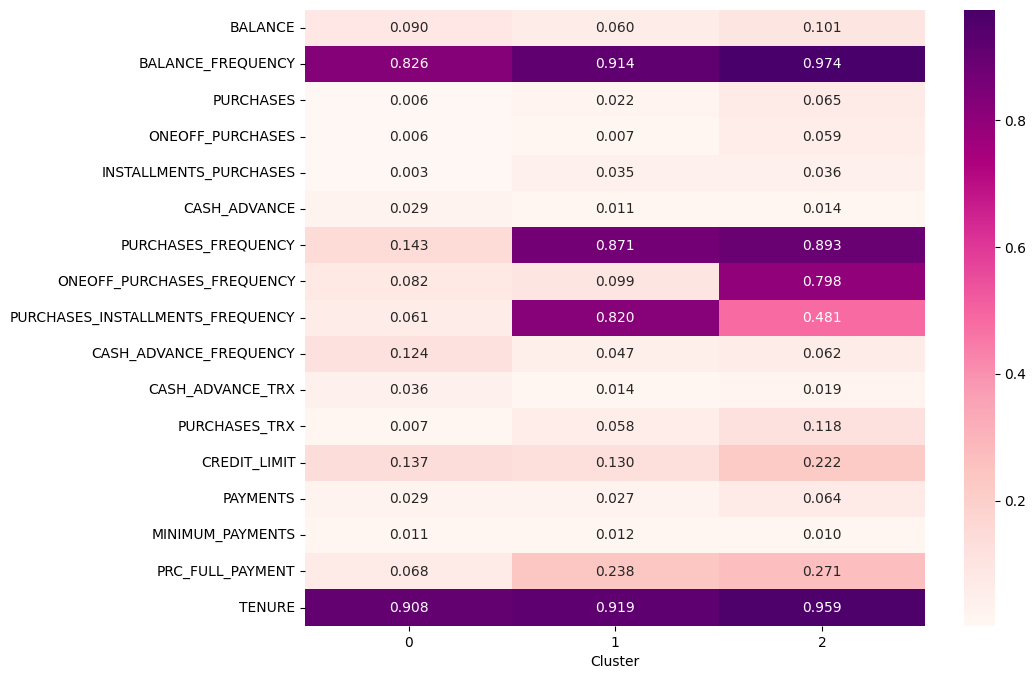

In [44]:
plt.figure(figsize=(10, 8))
sns.heatmap(clustered_data.T, cmap='RdPu', annot=True, fmt=".3f")
plt.show()

In [45]:
clustered_data

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
Cluster,,,,,,,,,,,,,,,,,
0,0.089549,0.826392,0.006031,0.005715,0.002800,0.028794,0.143219,0.081542,0.060573,0.123875,0.035956,0.007475,0.136615,0.029117,0.010800,0.068350,0.908003
1,0.059820,0.913869,0.021747,0.006598,0.035474,0.010669,0.870860,0.098692,0.819835,0.047141,0.014069,0.058154,0.130222,0.027445,0.012003,0.237883,0.919212
2,0.101082,0.973706,0.065199,0.058715,0.035735,0.013979,0.893007,0.798486,0.480963,0.062367,0.018998,0.118224,0.222007,0.063702,0.010086,0.270895,0.958651


- Mengevalusi Model menggunakan Silhouette Score dan Davies-Bouldin score

In [46]:
print(f'Davies-Bouldin index = {davies_bouldin_score(df_kmeans, kmeans_labels)}')
print(f'Silhouette Score     = {silhouette_score(df_kmeans, kmeans_labels)}')

Davies-Bouldin index = 0.8497385945829833


Silhouette Score     = 0.5332658514456283


-----
# **PCA- KMEANS**
    PCA adalah singkatan dari Principal Component Analysis. PCA adalah suatu teknik analisis statistik multivariat yang digunakan untuk mereduksi suatu data dengan cara mentransformasi data secara linier sehingga terbentuk sistem koordinat baru dengan varians maksimum

In [47]:
data_pca = df_scaler.copy()

Pada analisi ini, PCA akan mempertahankan 90% varians dalam dataset sehingga set n_components = 0.9

In [48]:
pca_Kmeans = PCA(n_components=0.9, random_state=42)
pca = pca_Kmeans.fit(data_pca)

In [49]:
m = ['PC'+str(n) for n in range(1, len(pca.components_)+1)]
df_PCA= pd.DataFrame(pca.transform(data_pca), columns=m)

In [50]:
df_PCA.head()

,PC1,PC2,PC3,PC4,PC5
0,-0.482269,-0.097884,-0.046164,-0.057872,0.109999
1,-0.608709,-0.019549,0.082455,-0.218465,-0.098923
2,0.304349,0.921073,0.010665,0.159440,0.162258
3,-0.588699,-0.005678,0.037157,0.004825,0.223701
4,-0.554502,0.052616,-0.084019,-0.132619,-0.017021


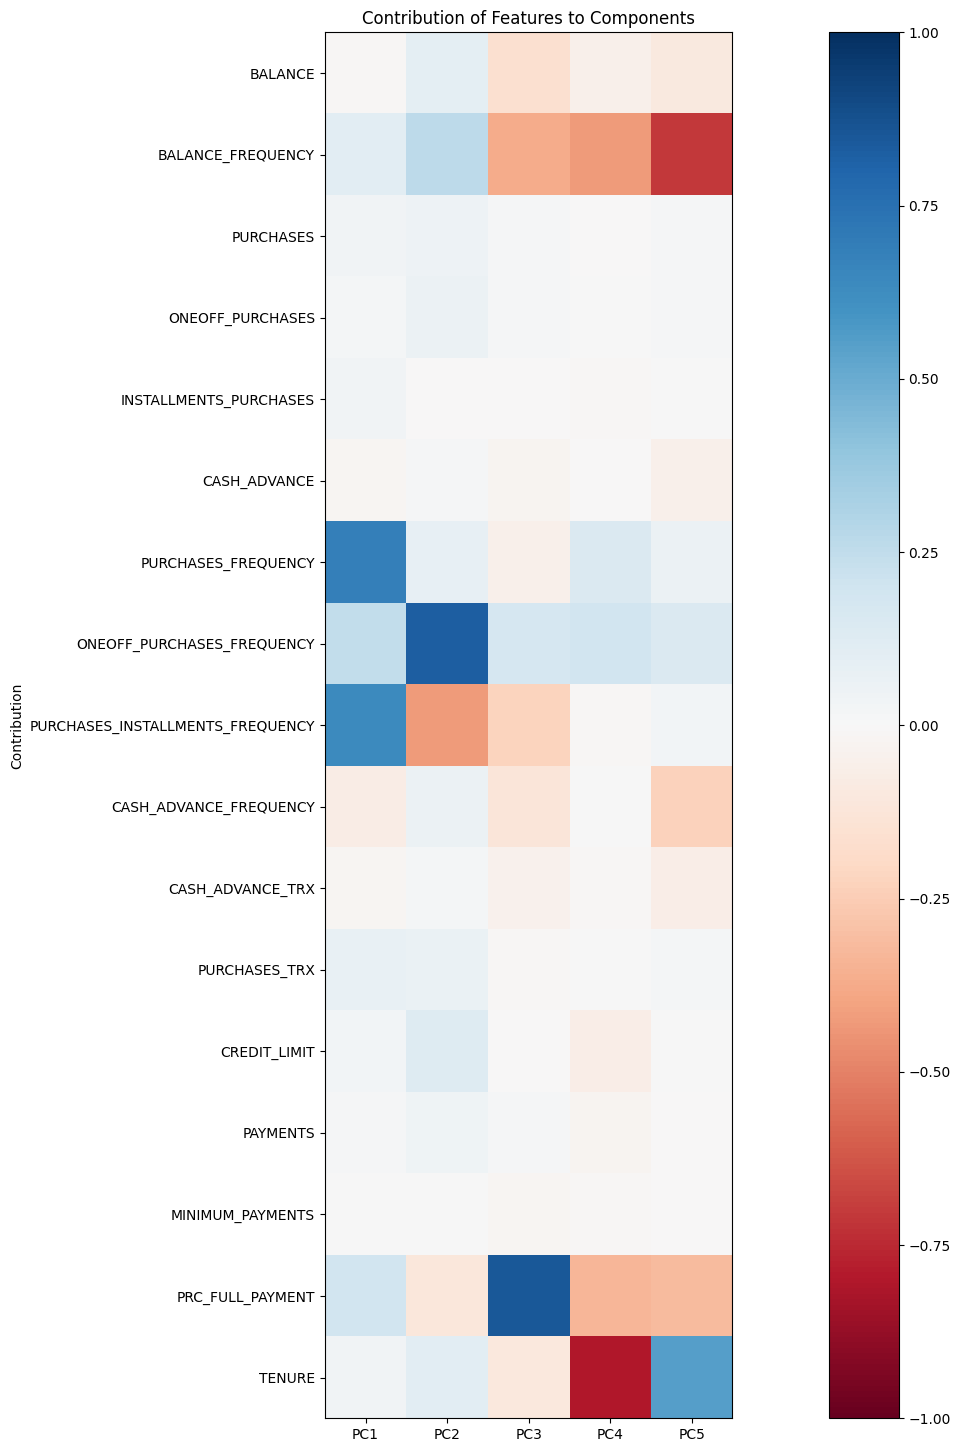

In [51]:
fig, ax = plt.subplots(figsize=(25, 18))
plt.imshow(pca.components_.T,
           cmap="RdBu",
           vmin=-1,
           vmax=1,
          )
plt.yticks(range(len(data_pca.columns)), data_pca.columns)
plt.xticks(range(len(df_PCA.columns)), df_PCA.columns)
plt.ylabel("Contribution")
plt.title("Contribution of Features to Components")
plt.colorbar()

### 1. Menemukan parameter n_clusters yang optimal menggunakan metode Elbow

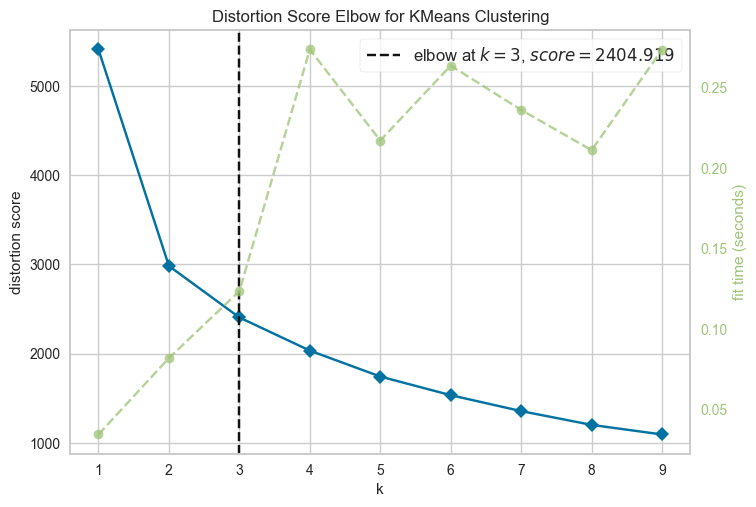

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [52]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(df_PCA)
visualizer.show()

### 2. Membuat Model K-Means PCA

In [53]:
Kmeans_PCAmodel = KMeans(visualizer.elbow_value_, random_state=42)
labels = Kmeans_PCAmodel.fit_predict(df_PCA)

In [54]:
data_pca['LABELS'] = labels
df_PCA['LABELS'] = labels

- Melihat banyak data pada setiap cluster

<Axes: title={'center': 'Using K-Means PCA Model'}, ylabel='count'>

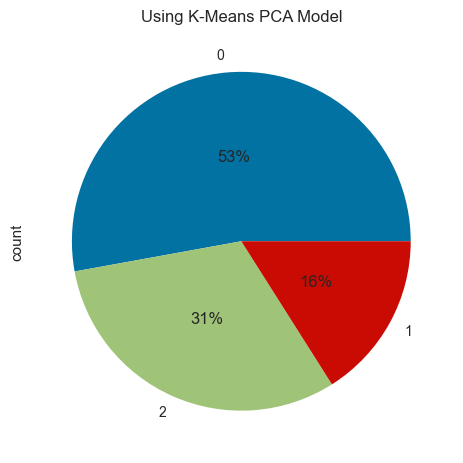

In [55]:
df_PCA.LABELS.value_counts().plot.pie(autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.1,
                                         title="Using K-Means PCA Model")


In [56]:
df_PCA.LABELS.value_counts()

LABELS
0    4730
2    2786
1    1433
Name: count, dtype: int64

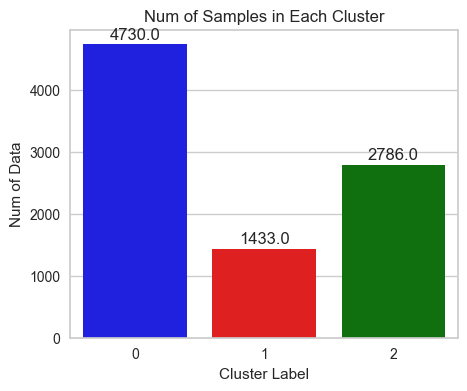

In [57]:
x = pd.Series(df_PCA.LABELS).value_counts().sort_index().reset_index()
x.columns = ['Cluster Label', 'Num of Data']
plt.figure(figsize=(5,4))
plt.title("Num of Samples in Each Cluster")
ax = sns.barplot(data=x, x='Cluster Label', y='Num of Data', palette = ('blue', 'red','green') )
for i in ax.patches:
        ax.annotate(format(i.get_height()), (i.get_x() + i.get_width()/2.,i.get_height()),
               ha='center',va='center',xytext=(0,7), textcoords='offset points')

### 3. Mengevaluasi Cluster 

In [58]:
print("---------- Using PCA-Kmeans Model ----------")
print(f'Davies-Bouldin index = {davies_bouldin_score(df_PCA, labels)}')
print(f'Silhouette Score = {silhouette_score(df_PCA, labels)}')

---------- Using PCA-Kmeans Model ----------
Davies-Bouldin index = 0.763510545151182


Silhouette Score = 0.5884353854639267


## **Visualisasi Hasil Clustering K-Means PCA**

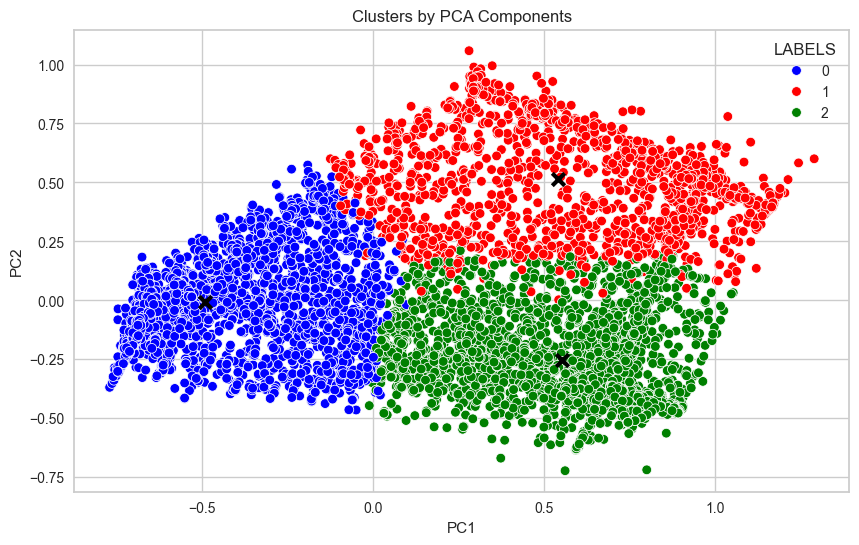

In [59]:
x_axis = df_PCA['PC1']
y_axis = df_PCA['PC2']
plt.figure(figsize=(10,6))
sns.scatterplot(x=x_axis, y=y_axis, hue=df_PCA['LABELS'], palette=['blue', 'red','green'])
centroid = Kmeans_PCAmodel.cluster_centers_
plt.scatter(centroid[:, 0], centroid[:, 1],
            marker='x', s=80,
            color='black', zorder=10,lw=3)
plt.title('Clusters by PCA Components')
plt.show()

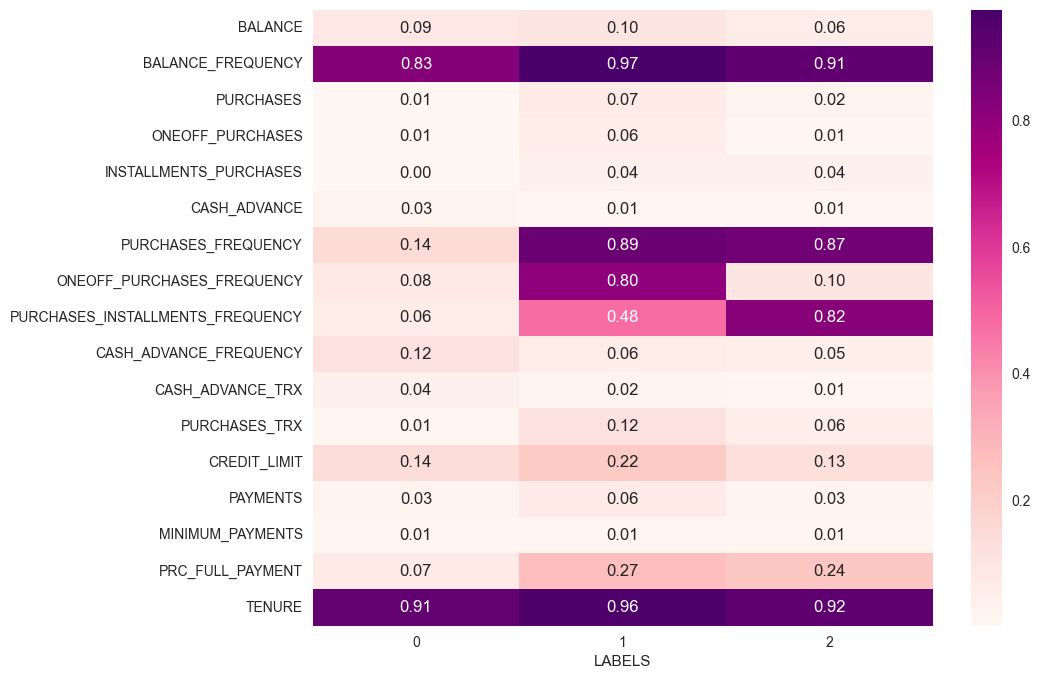

In [60]:
clustered_PCA = data_pca.groupby("LABELS").mean()
plt.figure(figsize=(10, 8))
sns.heatmap(clustered_PCA.T, cmap='RdPu', annot=True, fmt=".2f")
plt.show()

### **INSIGHT**
1. Cluster 0 dengan jumlah user 4730
    - Tipe user yang memiliki limit kartu kredit yang medium
    - Memiliki tingkat periode kartu kredit medium
    - Memiliki saldo yang cukup tinggi
    - Cukup sering memperbarui saldo
    - Hampir tidak pernah melakukan transaksi pembelian dan menyicil
    - Lebih sering menggunakan uang tunai

2. Cluster 1 dengan jumlah user 1433
    - Tipe user dengan limit kartu kredit dan saldo paling tinggi
    - User tipe ini sangat sering memperbarui saldo
    - Memiliki tingkat periode kartu kredit yang lama
    - Sangat Sering melakukan transaksi pembelian
    - Lebih sering melakukan sekali bayar (One Off Purchases) dibandingkan menyicil
    - Jarang melakukan pembayaran dengan uang tunai
    - Mempunyai persentase pembayaran penuh yang tinggi

3. Cluster 2 dengan jumlah user 2786
    - Tipe user yang memiliki limit kartu kredit yang medium
    - Tipe user yang memiliki saldo rendah
    - Sering memperbarui saldo
    - Memiliki tingkat periode kartu kredit medium
    - Sangat sering melakukan transaksi pembelian
    - User dengan type pembelian yang paling sering menyicil. Transaksi pembelian dicicil lebih sering dari pada sekali bayar (One Off Purchases) 
    - Tipe user yang sangat jarang melakukan transaksi dengan uang muka
    - Mempunyai persentase pembayaran penuh yang medium.



# **K. Model Inference**
----

Saat evaluasi model menggunakan Davies bouldin Score dan Silhouette Score, model Kmeans yang direduksi dahulu menggunakan PCA lebih optimal dibandingkan yang belum direduksi. Sehingga pada model Inference menggunakan model PCA-Kmeans

Pada model inference ini dibuat dataset random dengan menggunakan make_blobs. Selanjutnya membuat clustering menggunakan model yang sudah dijalankan sebelumnya yaitu model PCA-Kmeans

In [61]:
from sklearn.datasets import make_blobs

X, y_true = make_blobs(n_samples=5000, centers=3, cluster_std=0.60, random_state=42)

In [62]:
pc = PCA(n_components=0.9, random_state=42)
pc.fit(X)

PCA(n_components=0.9, random_state=42)

In [63]:
X_pca = pc.transform(X)

# Menggunakan KMeans untuk memprediksi cluster
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(X_pca)

# Memprediksi cluster untuk setiap sampel dalam data baru
y_pred = kmeans.predict(X_pca)

print('Cluster Centers:', kmeans.cluster_centers_)
print('Labels:', kmeans.labels_)

Cluster Centers: [[-3.29786951  5.29560272]
 [ 9.7462934  -1.02953022]
 [-6.44257729 -4.2666901 ]]
Labels: [0 0 2 ... 0 2 0]


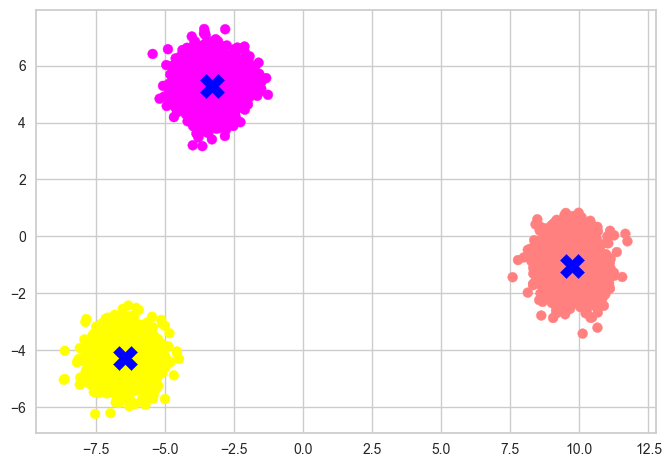

In [64]:
import matplotlib.pyplot as plt

# Plot data points
plt.scatter(X_pca[:, 0], X_pca[:, 1], s=50, c=kmeans.labels_, cmap='spring')  # Ganti cmap dan marker
# Plot cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='blue', marker='X')  # Ganti warna, marker, dan ukuran
plt.show()

# **L. KESIMPULAN**

Pada final project ini dilakukan pemodelan  untuk melakukan clustering terhadap Credit card customer :
1. Menggunakan feature scalling menggunakan minmaxscaler agar data didapatkan hasil yang positif.
2. Membandingkan K-Means model dengan K-Medoids model. Setelah diuji menggunakan Davies bouldin Score dan Silhouette Score,**K-Means model** dapat **menghasilkan hasil cluster yang optimal** dapat dibuktikan dari score DBI paling mendekati 0 atau lebih kecil dibandingkan dengan metode K-Medoids dan score Silhouette yang mendekati 1 atau lebih besar dari K-Medoids.
3. Melakukan perbandingan model K-Means yang tidak direduksi dengan model K-Means yang di reduksi menggunakan PCA dengan n_components = 0.9. Diperoleh model yang **paling optimal adalah model K-Means setelah dilakukan reduksi menggunakan PCA**. 

<br> Kesimpulan hasil clustering credit card customer :
1. Cluster 0 dengan jumlah user 4730
    - Tipe user yang memiliki limit kartu kredit yang medium
    - Memiliki tingkat periode kartu kredit medium
    - Memiliki saldo yang cukup tinggi
    - Cukup sering memperbarui saldo
    - Hampir tidak pernah melakukan transaksi pembelian dan menyicil
    - Lebih sering menggunakan uang tunai

2. Cluster 1 dengan jumlah user 1433
    - Tipe user dengan limit kartu kredit dan saldo paling tinggi
    - User tipe ini sangat sering memperbarui saldo
    - Memiliki tingkat periode kartu kredit yang lama
    - Sangat Sering melakukan transaksi pembelian
    - Lebih sering melakukan sekali bayar (One Off Purchases) dibandingkan menyicil
    - Jarang melakukan pembayaran dengan uang tunai
    - Mempunyai persentase pembayaran penuh yang tinggi

3. Cluster 2 dengan jumlah user 2786
    - Tipe user yang memiliki limit kartu kredit yang medium
    - Tipe user yang memiliki saldo rendah
    - Sering memperbarui saldo
    - Memiliki tingkat periode kartu kredit medium
    - Sangat sering melakukan transaksi pembelian
    - User dengan type pembelian yang paling sering menyicil. Transaksi pembelian dicicil lebih sering dari pada sekali bayar (One Off Purchases) 
    - Tipe user yang sangat jarang melakukan transaksi dengan uang muka
    - Mempunyai persentase pembayaran penuh yang medium.
